In [9]:
import pickle
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import linear_model, metrics

In [10]:
with open('../lesson_1/result.pickle', 'rb') as f:
    combine_df = pickle.load(f)
combine_df

,id,label,tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,when fatheare is dysfyounctional and is so sel...,"[when, fatheare, is, dysfyounctional, and, is,...","[fatheare, dysfyounctional, selfish, dareagare...","[fathear, dysfyounct, selfish, dareagarein, ki...","[fatheare, dysfyounctional, selfish, dareagare..."
1,2,0.0,thanks foare lyft careedit cannot youse cayous...,"[thanks, foare, lyft, careedit, can, not, yous...","[thanks, foare, lyft, careedit, youse, cayouse...","[thank, foar, lyft, careedit, yous, cayous, of...","[thank, foare, lyft, careedit, youse, cayouse,..."
2,3,0.0,bihday yoyouare majesty,"[bihday, yoyouare, majesty]","[bihday, yoyouare, majesty]","[bihday, yoyouar, majesti]","[bihday, yoyouare, majesty]"
3,4,0.0,model love you take with you all the time in y...,"[model, love, you, take, with, you, all, the, ...","[model, love, take, time, youare]","[model, love, take, time, youar]","[model, love, take, time, youare]"
4,5,0.0,factsgareinyouide society now motivation,"[factsgareinyouide, society, now, motivation]","[factsgareinyouide, society, motivation]","[factsgareinyouid, societi, motiv]","[factsgareinyouide, society, motivation]"
...,...,...,...,...,...,...,...
49154,49155,NaN,thoyougareinht factoarey leftareigareinht pola...,"[thoyougareinht, factoarey, leftareigareinht, ...","[thoyougareinht, factoarey, leftareigareinht, ...","[thoyougareinht, factoarey, leftareigareinht, ...","[thoyougareinht, factoarey, leftareigareinht, ..."
49155,49156,NaN,feelingarein like mearemaid haiareflip neveare...,"[feelingarein, like, mearemaid, haiareflip, ne...","[feelingarein, like, mearemaid, haiareflip, ne...","[feelingarein, like, mearemaid, haiareflip, ne...","[feelingarein, like, mearemaid, haiareflip, ne..."
49156,49157,NaN,hillaarey campaigareinned today in ohiooh my g...,"[hillaarey, campaigareinned, today, in, ohiooh...","[hillaarey, campaigareinned, today, ohiooh, go...","[hillaarey, campaigarein, today, ohiooh, godar...","[hillaarey, campaigareinned, today, ohiooh, go..."
49157,49158,NaN,happy at woarek confeareence areigareinht mind...,"[happy, at, woarek, confeareence, areigareinht...","[happy, woarek, confeareence, areigareinht, mi...","[happi, woarek, confear, areigareinht, mindset...","[happy, woarek, confeareence, areigareinht, mi..."


В качестве заготовки для задания прогоним часть 2ого домашнего задания. Нам необходимо получить разреженные матрицы, используя CountVectorizer, TfidfVectorizer для 'tweet_stemmed' и 'tweet_lemmatized' столбцов (4 матрицы).

In [11]:
def vectorize(tokens):
    model = CountVectorizer(stop_words='english',
                                   max_features=1000, 
                                   max_df=0.9,)
    documents =[]
    for token in tokens:
        for word in token:
            documents.append(word)
  
    fit_model = model.fit_transform(documents)
    
    return model, fit_model, model.get_feature_names()

In [12]:
count_vectorizer_stem, bag_of_words_stem, feature_names_stem = vectorize(combine_df['tweet_stemmed'].values)
count_vectorizer_lemm, bag_of_words_lemm, feature_names_lemm = vectorize(combine_df['tweet_lemmatized'].values)

In [13]:
df_stem_countVect = pd.DataFrame(bag_of_words_stem.toarray(), columns = feature_names_stem)
df_lem_countVect = pd.DataFrame(bag_of_words_lemm.toarray(), columns = feature_names_lemm)

In [14]:
def vectorize_tfid(tokens):
    model = TfidfVectorizer(stop_words='english',
                                   max_features=1000, 
                                   max_df=0.9,)
    documents =[]
    for token in tokens:
        for word in token:
            documents.append(word)  
    fit_model = model.fit_transform(documents)
    
    return model, fit_model, model.get_feature_names()

In [15]:
count_vectorizer_stem_t, bag_of_words_stem_t, feature_names_stem_t = vectorize_tfid(combine_df['tweet_stemmed'].values)
count_vectorizer_lemm_t, bag_of_words_lemm_t, feature_names_lemm_t = vectorize_tfid(combine_df['tweet_lemmatized'].values)

In [16]:
df_stem_TfidVect = pd.DataFrame(bag_of_words_stem_t.toarray(), columns = feature_names_stem_t)
df_lem_TfidVect = pd.DataFrame(bag_of_words_lemm_t.toarray(), columns = feature_names_lemm_t)

Задание 1.
Построим модель LogisticRegression, используя Bag-of-Words признаки для столбца combine_df['tweet_stemmed']. 
- Поделим Bag-of-Words признаки на train, test (train заканчивается на 31962 строке combine_df)
- Ответами является столбец train_df['label']
- Рассчитаем predict_proba, приведем prediction в в бинарный вид: если предсказание >= 0.3 то 1, иначе 0, тип заменим на int
- Рассчитаем f1_score 

Повторим аналогично для столбца combine_df['tweet_lemmatized'].

In [17]:
train_x = df_stem_countVect.iloc[:25000]
train_y = combine_df.iloc[:25000]['label']
test_x = df_stem_countVect.iloc[25000:31962]
test_y =  combine_df.iloc[25000:31962]['label']

train_x_lem = df_lem_countVect.iloc[:25000]
test_x_lem = df_lem_countVect.iloc[25000:31962]

In [18]:
def pred_to_bin(pred):
    if pred > 0.3:
        return 1
    else:
        return 0

In [20]:
model = linear_model.LogisticRegression()
model.fit(train_x, train_y)
predictions = model.predict_proba(test_x)
pred_bin = pd.Series(predictions[:,0]).apply(pred_to_bin)
metrics.f1_score(test_y, pred_bin)

0.13100671140939596

In [21]:
model2 = linear_model.LogisticRegression()
model2.fit(train_x_lem, train_y)
predictions2 = model2.predict_proba(test_x_lem)
pred_bin2 = pd.Series(predictions2[:,0]).apply(pred_to_bin)
metrics.f1_score(test_y, pred_bin)

0.13100671140939596

Задание 2.
Построим модель LogisticRegression, используя TF-IDF признаки для столбца combine_df['tweet_stemmed']. 
- Поделим TF-IDF признаки на train, test (train заканчивается на 31962 строке combine_df)
- Ответами является столбец train_df['label']
- Рассчитаем predict_proba, приведем prediction в в бинарный вид: если предсказание >= 0.3 то 1, иначе 0, тип заменим на int
- Рассчитаем f1_score 

Повторим аналогично для столбца combine_df['tweet_lemmatized'].

In [22]:
train_x_Tfid = df_stem_TfidVect.iloc[:25000]
train_y = combine_df.iloc[:25000]['label']
test_x_Tfid = df_stem_TfidVect.iloc[25000:31962]
test_y =  combine_df.iloc[25000:31962]['label']

train_x_lem_Tfid = df_lem_TfidVect.iloc[:25000]
test_x_lem_Tfid = df_lem_TfidVect.iloc[25000:31962]

In [24]:
model3 = linear_model.LogisticRegression()
model3.fit(train_x_Tfid, train_y)
predictions3 = model3.predict_proba(test_x_Tfid)
pred_bin3 = pd.Series(predictions3[:,0]).apply(pred_to_bin)
metrics.f1_score(test_y, pred_bin3)

0.13100671140939596

In [26]:
model4 = linear_model.LogisticRegression()
model4.fit(train_x_lem_Tfid, train_y)
predictions4 = model3.predict_proba(test_x_lem_Tfid)
pred_bin4 = pd.Series(predictions4[:,0]).apply(pred_to_bin)
metrics.f1_score(test_y, pred_bin4)

0.13100671140939596

Задание 3.
Выведите результаты f1-score всех моделей, сделайте вывод.

Мне кажется, я гдето ошибся не могут все модели иметь одинаковый результат.

Задание 4.
Теперь перейдем к визуализации. Посмотрим, какие слова являются наиболее популярные в датасете с помощью облака слов (WordCloud).
Облако слов - это визуализация, в которой наиболее частые слова большого размера, а менее частые слова меньшего размера.
- объединим слова в одну строку
- создадим словарь частот слов с помощью collections.Counter
- нарисуем облако слов с частотами слов с помощью WordCloud.generate_from_frequencies()
- используем nltk.corpus.stopwords как параметр stopwords, чтобы убрать "мусорные" частотные слова

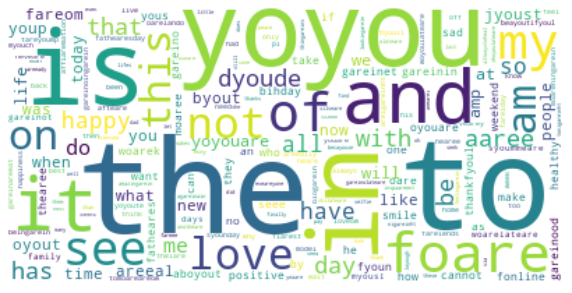

In [27]:
import collections
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words = []
for line in combine_df['tweet']: 
    line_words = line.split()
    words.extend(line_words)

wordfreq = collections.Counter(words)
wordcloud = WordCloud(
 background_color='white',
 max_words=2000,
 stopwords=nltk.corpus.stopwords
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Задание 5.
Теперь отобразим облако слов для отзывов, не содержащих токсичных комментариев (combine_df['label'] == 0). 

In [28]:
df_1 = combine_df.loc[combine_df['label'] == 0]

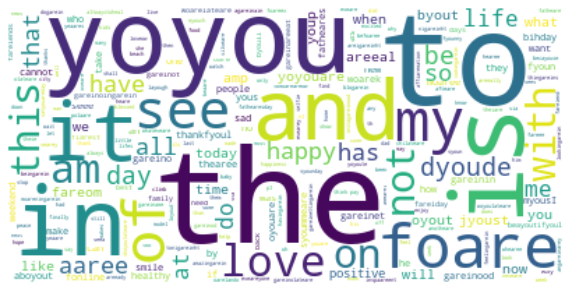

In [29]:
words = []
for line in df_1['tweet']: 
    line_words = line.split()
    words.extend(line_words)

wordfreq = collections.Counter(words)
wordcloud = WordCloud(
 background_color='white',
 max_words=2000,
 stopwords=nltk.corpus.stopwords
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Задание 6.
Теперь отобразим облако слов для отзывов, содержащих токсичные комментарии (combine_df['label'] == 1). 

In [30]:
df_2 = combine_df.loc[combine_df['label'] == 1]

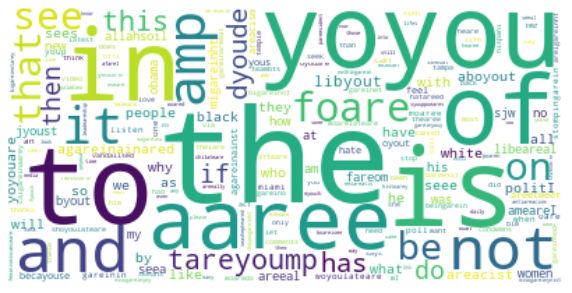

In [31]:
words = []
for line in df_2['tweet']: 
    line_words = line.split()
    words.extend(line_words)

wordfreq = collections.Counter(words)
wordcloud = WordCloud(
 background_color='white',
 max_words=2000,
 stopwords=nltk.corpus.stopwords
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()